In [1]:
import numpy as np
import pandas as pd
import os 
import warnings
import matplotlib.pyplot as plt
import math

warnings.filterwarnings("ignore")

In [2]:
concat = pd.read_csv('CSVs/grouping/Concatenated.csv')
concat.head()

,Sequence_ID,Site,Starting_position,Score,Width,File_name,Score_group,Algorithm,Subgroup
0,1030995-1031010-reverse,AAGATAAGGG,377.0,2600000.0,10.0,FIS,5,meme,FIS_5_1030995-1031010-reverse
1,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse
2,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse
3,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse
4,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse


In [3]:
concat.shape

(227952, 9)

# **Voting**

In [4]:
# # Create an empty dataframe to store the voting results
# voting_results = pd.DataFrame(columns=['Sequence_ID', 'Votes'])

# # Iterate over each subgroup
# for subgroup, subgroup_df in concat.groupby('Subgroup'):
#     # Group the subgroup dataframe by 'Sequence_ID' and count the number of occurrences
#     voting_counts = subgroup_df.groupby('Sequence_ID').size().reset_index(name='Votes')
    
#     # Add the subgroup information to the voting counts dataframe
#     voting_counts['Subgroup'] = subgroup
    
#     # Append the voting counts to the results dataframe
#     voting_results = voting_results.append(voting_counts, ignore_index=True)

# # Sort the voting results dataframe by 'Votes' in descending order
# voting_results = voting_results.sort_values('Votes', ascending=False)

In [5]:
# voting_results.head()

In [6]:
# Create dictionaries to store the counts of sites and starting positions
site_counts = {}
starting_position_counts = {}

# Iterate over each row in the concatenated dataframe
for index, row in concat.iterrows():
    subgroup = row['Subgroup']
    site = row['Site']
    starting_position = row['Starting_position']
    
    # Update the site count dictionary
    if pd.notnull(site):
        if subgroup not in site_counts:
            site_counts[subgroup] = {}
        if site not in site_counts[subgroup]:
            site_counts[subgroup][site] = 0
        site_counts[subgroup][site] += 1
    
    # Update the starting position count dictionary
    if pd.notnull(starting_position):
        if subgroup not in starting_position_counts:
            starting_position_counts[subgroup] = {}
        if starting_position not in starting_position_counts[subgroup]:
            starting_position_counts[subgroup][starting_position] = 0
        starting_position_counts[subgroup][starting_position] += 1

# # Print the site count dictionary
# print("Site Counts:")
# for subgroup, counts in site_counts.items():
#     print(f"Subgroup: {subgroup}")
#     for site, count in counts.items():
#         print(f"Site: {site}, Count: {count}")
#     print()

# # Print the starting position count dictionary
# print("Starting Position Counts:")
# for subgroup, counts in starting_position_counts.items():
#     print(f"Subgroup: {subgroup}")
#     for starting_position, count in counts.items():
#         print(f"Starting Position: {starting_position}, Count: {count}")
#     print()


In [7]:
concat.head()

,Sequence_ID,Site,Starting_position,Score,Width,File_name,Score_group,Algorithm,Subgroup
0,1030995-1031010-reverse,AAGATAAGGG,377.0,2600000.0,10.0,FIS,5,meme,FIS_5_1030995-1031010-reverse
1,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse
2,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse
3,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse
4,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse


In [8]:
concat['Width'].fillna(concat['Site'].str.len(), inplace=True)

In [9]:
concat['Position_Range'] = concat.apply(lambda row: range(int(row['Starting_position']), int(row['Starting_position'] + row['Width'])), axis=1)
concat.head()

,Sequence_ID,Site,Starting_position,Score,Width,File_name,Score_group,Algorithm,Subgroup,Position_Range
0,1030995-1031010-reverse,AAGATAAGGG,377.0,2600000.0,10.0,FIS,5,meme,FIS_5_1030995-1031010-reverse,"(377, 378, 379, 380, 381, 382, 383, 384, 385, ..."
1,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse,"(253, 254, 255, 256, 257, 258, 259, 260, 261, ..."
2,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse,"(253, 254, 255, 256, 257, 258, 259, 260, 261, ..."
3,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse,"(253, 254, 255, 256, 257, 258, 259, 260, 261, ..."
4,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse,"(253, 254, 255, 256, 257, 258, 259, 260, 261, ..."


In [10]:
# Make sure Position_Range contains list of positions, not range objects
concat['Position_Range'] = concat['Position_Range'].apply(list)

# Expand each list of positions into new rows, keeping the same index
positions = concat['Position_Range'].apply(pd.Series).stack()

# Reset index and rename columns for clarity
positions = positions.reset_index().rename(columns={'level_0':'original_index', 0:'Position'})

# Add Subgroup information back into new DataFrame
positions['Subgroup'] = positions['original_index'].apply(lambda idx: concat.loc[idx, 'Subgroup'])

# Now, for each subgroup, we can count the occurrences of each position
votes = positions.groupby(['Subgroup', 'Position']).size().reset_index().rename(columns={0:'Votes'})

# Pivot to make each Subgroup a separate column
voting_results = votes.pivot(index='Position', columns='Subgroup', values='Votes').fillna(0)

voting_results = voting_results.transpose()
voting_results.columns = voting_results.columns.astype(int)
voting_results.head()


Position,1,2,3,4,5,6,7,8,9,10,...,466,467,468,469,470,471,472,473,474,475
Subgroup,,,,,,,,,,,,,,,,,,,,,
Ada_1_209398-209425-forward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_1_2145603-2145630-reverse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_1_2308475-2308502-reverse,0.0,0.0,0.0,1.0,21.0,21.0,24.0,24.0,24.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_2_209398-209425-forward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_2_2145603-2145630-reverse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


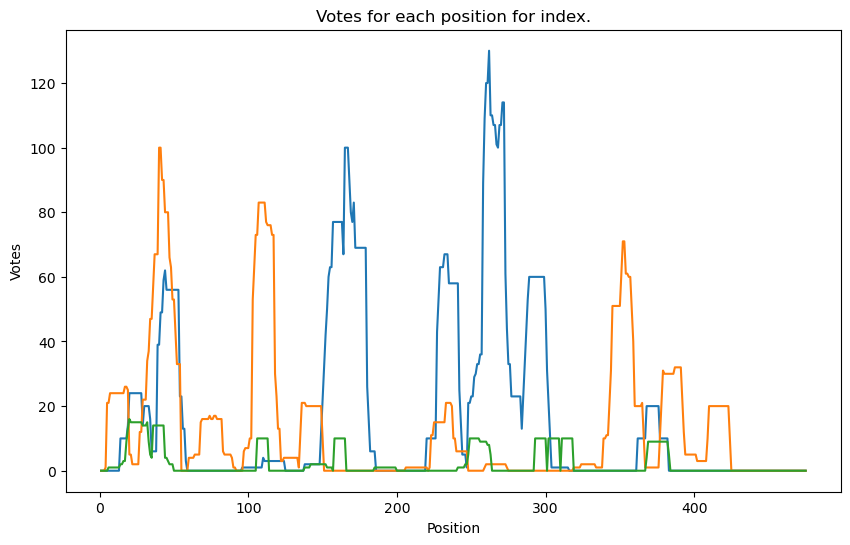

In [20]:
index_to_plot = ['Ada_1_209398-209425-forward', 'Ada_1_2308475-2308502-reverse','Ada_2_209398-209425-forward']

plt.figure(figsize=(10, 6))

for index in index_to_plot:
    plt.plot(voting_results.columns, voting_results.loc[index], label=index)

plt.xlabel('Position')
plt.ylabel('Votes')
plt.title('Votes for each position for index.')
plt.show()


# **Smoothing**

In [21]:
concat['Rounded_Width'] = concat['Width'].apply(lambda x: math.ceil(x / 2))

# Transpose the voting_results DataFrame
transposed_results = voting_results.transpose()

# Apply rolling window operation row-wise
window_size = int(concat['Rounded_Width'].median())
smoothed_results = transposed_results.rolling(window=window_size, center=True, min_periods=1).sum()

# Transpose the result back to the original orientation
smoothed_results = smoothed_results.transpose()

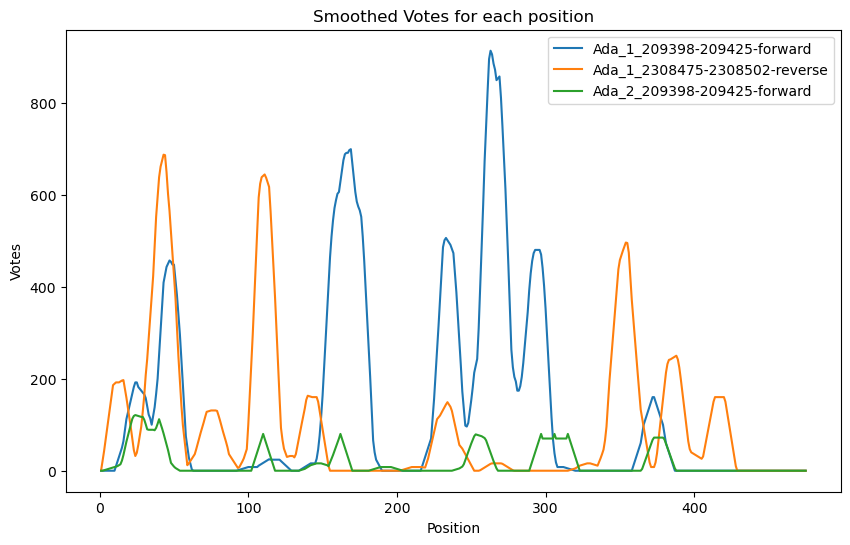

In [22]:
plt.figure(figsize=(10, 6))

for index in index_to_plot:
    plt.plot(smoothed_results.columns, smoothed_results.loc[index], label=index)

plt.xlabel('Position')
plt.ylabel('Votes')
plt.title('Smoothed Votes for each position')
plt.legend()
plt.show()


# **Extraction**

In [26]:
def get_max_and_range(smoothed_df):
    # Create a DataFrame with maximum values and their positions (column names)
    max_values_df = smoothed_df.idxmax(axis=1).to_frame('Position')
    max_values_df['Max_Value'] = smoothed_df.max(axis=1)

    # Convert 'Position' column to integer, as it might be in string format
    max_values_df['Position'] = max_values_df['Position'].astype(int)

    # Create a new column with the range
    max_values_df['Range'] = max_values_df['Position'].apply(lambda x: range(x - 7, x + 8))
    
    return max_values_df


In [27]:
max_values_df = get_max_and_range(smoothed_results)
max_values_df.head()

,Position,Max_Value,Range
Subgroup,,,
Ada_1_209398-209425-forward,263,913.0,"(256, 257, 258, 259, 260, 261, 262, 263, 264, ..."
Ada_1_2145603-2145630-reverse,157,511.0,"(150, 151, 152, 153, 154, 155, 156, 157, 158, ..."
Ada_1_2308475-2308502-reverse,43,687.0,"(36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4..."
Ada_2_209398-209425-forward,24,121.0,"(17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2..."
Ada_2_2145603-2145630-reverse,386,96.0,"(379, 380, 381, 382, 383, 384, 385, 386, 387, ..."


In [28]:
max_values_df.to_csv('CSVs/Extracted/positions.csv')